Importing Necessary libraries

In [2]:
import numpy as np
from array import array
import matplotlib.pyplot as plt
import time


**Problem Statment 1.**
Write a function to generate an input data matrix X of size NxD for regression.

a) Input: Sample size N and a generator matrix S of size MxD

b) Working: First generate a random 2-D array of size NxM where each column has a standard normal distribution and is independent of the other columns. Then multiply this with the
generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that
if the generator matrix S of size MxD is an identity matrix, then each column of X will
remain independent; otherwise we can introduce correlations in the matrix columns of X.

In [3]:
def Matrix_for_Regression(N,S):
 E = np.random.randn(N,M)         #creates random matrix of N*M with standard normal distribution(reference1)
 X= np.matmul(E, S)               #multiplying E with the generator matrix S to give an output matrix X of size NxD
 return X


#For generator matrix S

#for geneartor matrix of diemsions M*D provide valus of M and D
M = int(input("Enter the number of rows for ganerator matrix(M):"))
D = int(input("Enter the number of columns ganerator matrix(D):"))
print("Enter the elements of matrix in a single line (separated by space): ")
entries = list(map(float, input().split()))                                     #reference2
S = np.array(entries).reshape(M, D)
print(S)

#provide total number of samples
N= int(input("Enter the total number of samples"))

#printing Matrix X for regression
X= Matrix_for_Regression(N,S)
print("Matrix X is : ")
print(X)



Enter the number of rows for ganerator matrix:2
Enter the number of columns ganerator matrix:2
Enter the elements of matrix in a single line (separated by space): 
1 2 3 4
[[1. 2.]
 [3. 4.]]
Enter the total number of samples4
Matrix X is : 
[[-2.56992579 -3.90129551]
 [ 5.69701205  7.89763578]
 [ 1.33860039  2.16254032]
 [-0.43884724 -1.26422486]]


references:
1. https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

2. https://www.geeksforgeeks.org/take-matrix-input-from-user-in-python/

**Problem Statment 2.**
 **Write a function to generate the target vector t of size Nx1:**

a) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ

b) Working: Check for dimension mismatch between X and w, multiply X with w (sans one
element) and add the bias (the excluded element), then add zero-mean Gaussian noise
with variance σ.

In [6]:
def targetVec(X,W,Var):
  #Data matrix is of diemnsions N*D and Weight matrix is of dimensions D+1*1
  #Checking for dimension mismatch between X and w
  if len(W) == X.shape[1]+1:
  #for matrix multiplication we need to adjust the dimension of matrix
  #Last element of weight vector is bias term so remove it
    W1 = np.delete(W, -1)
    W1 = np.array(W1).reshape(D,1)              #converting list to array
    A= np.matmul(X,W1)                          #multiplying W1 with the  matrix X to give an matrix  of size Nx1
    Bias= W[-1]                                 #Last element of weight vector is bias
  #randomly generated  guassain noise with input variance and mean zero
    std_dev= np.sqrt(Var)
    Noise= np.random.normal(0, std_dev, A.shape)                        #ref1
  #target vector will be
    t= A+ Bias +Noise
    return t
  else :
    print("Dimensions of weight vector and data mextrix does not match")


#creating matrix X og N*D
N = int(input("Enter the sample size N:"))
D = int(input("Enter the Size of Dimension D:"))
X= np.random.randn(N,D)

# creating array W of D+1 dimension
print("Enter the elements of D+1 dimensions for weight matrix W(last element being bias):")
W= list(map(int, input().split()))

#Provide variance for guassian noise
Var= np.float64(input("enter the value of Variance for noise:"))
t=targetVec(X,W,Var)
print("target vector is:")
print(t)





Enter the sample size N:2
Enter the Size of Dimension D:2
Enter the elements of D+1 dimensions for weight matrix W(last element being bias):
1 2 3
enter the value of Variance for noise:.09
[[-0.02865561]
 [-0.47293257]]
(2, 1)
target vector is:
[[1.56229904]
 [2.69982158]]


ref:
https://medium.com/@ms_somanna/guide-to-adding-noise-to-your-data-using-python-and-numpy-c8be815df524

3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg
package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N
(use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve
the problem above a particular value of N? What could be the reason for the same? [1]

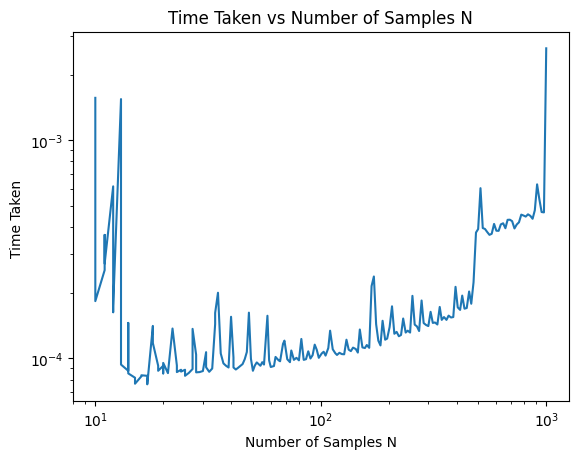

In [4]:
#function for generarting data matrix X
def matrix_generator(N,D):
  X=np.random.randn(N,D)
  return X

#function for analytical solver
def pinv(X):                                               #inspiration: chatgpt
    start_time = time.time()                                  #check starting time of operation
    Pinv = np.linalg.pinv(X)                                  #calculate psudo inverse
    end_time = time.time()                                    #check end time of operation
    time_diff = end_time - start_time
    return time_diff

# Parameters
D = 10                                                       # Number of features (fixed)
n1 = np.logspace(1,3 ,base=10 ,num=200, dtype=int)             # Varying number of samples N from 10 to 100000 on log scale

#  for loop to calculate time taken to solve using pinv for different N values
time_for_n = []                                               #creating empty list
for N in n1:
    X = matrix_generator(N, D)                                     #using pinv function
    time_for_n.append(pinv(X))                              #appending element to list

# Plotting results
plt.plot(n1, time_for_n)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples N')
plt.ylabel('Time Taken ')
plt.title('Time Taken vs Number of Samples N')
plt.show()

observation:Initially with increase in number of samples time taken for each operation increases. But after some number sample incrased time reduces and tries to die. But increasing number of sample again time for operation increases again.

ref: https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html

4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target
vector t and a predicted vector y.

In [6]:
#defining function for Normalised root mean square
def NRMSE(t,y):
  error_matrix= np.subtract(t,y)        #creating error array
  sqr_error= np.square(error_matrix)
  square_error= np.sum(sqr_error)       #total error of array
  Mean_sqr_error= (square_error/N)
  RMSE=np.sqrt(Mean_sqr_error)
  NRMSE=RMSE/(np.max(t)-np.min(t))          #reference1
  return NRMSE

#providing total number of samples
N=int(input("provide total number of samples: "))
#generating random vector denoting target vector t
t= np.random.randn(N,1)
#generating predicted vector equals target vector with some noise so that error can be visualised
y= t+np.random.normal(0,0.1,t.shape)
NRMSE1= NRMSE(t,y)
#printing result
print("Normalised root mean square error is")
print("nrmse= ",NRMSE1)



provide total number of samples: 6
Normalised root mean square error is
nrmse=  0.019858792307030745


ref: https://www.statisticshowto.com/nrmse/
https://permetrics.readthedocs.io/en/latest/pages/regression/NRMSE.html

 5. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of
linear regression. Figure out what should be the inputs and outputs.

In [15]:
#function to predict values using linear regression
def linear_reggr(X,W,B):
  y= np.matmul(X,W)+B
  return y


#defining function for Gradient of mean square error
def grad_MSE(X,t,y):
  error= np.subtract(t,y)
  gradient = np.dot(np.transpose(X), error)*(-2/N)            #gradient of MSE with respect to weights will be of dimensions D*1
  return gradient

#provide total number of samples and features
N= int(input("provide total number of samples: "))
D= int(input("provide total number of feature: "))
B= int(input("provide value of bias: "))
#generating random data matrix X of N*D dimensions
X= np.random.randn(N,D)
#generating random weight vector
W= np.random.randn(D,1)
#predicted vector wii be y
y=linear_reggr(X,W,B)
#generating target weight vector
t= np.random.randn(N,1)

gradient= grad_MSE(X,t,y)
#print gradient of MSE with respect to weight of each feature
print("gradient of MSE with respect to weight of each feature")
print(gradient)

provide total number of samples: 12
provide total number of feature: 5
provide value of bias: 2
gradient of MSE with respect to weight of each feature
[[ 0.78354398]
 [ 3.54981108]
 [ 1.41465667]
 [-2.84585699]
 [-0.97216535]]


Input to function should be training data X of dimensions N*  D(Here, I created randomly),Weight vector W of dimension D *1(Here, I created randomly), target vector t of dimension N *1(Here, I created randomly) and Bias.
Output of function will be gradient of Mean square error with respect to each weight of dimensions D *1

 6.Write a function to calculate gradient of L2 norm of weights with respect to weights. [0.5]

In [11]:
#defining function for Gradient of L2 norm
def grad_L2norm(W):

  grad_L2norm= 2*W                  #reference1
  return grad_L2norm

#provide total number of  features
D= int(input("provide total number of features"))
#generating random weight vector
W=np.random.randn(D,1)
L2grad= grad_L2norm(W)
#printing gradient of L2 norm
print(L2grad)



provide total number of features5
[[-2.3642396 ]
 [ 1.45435263]
 [ 1.01163523]
 [-0.68349915]
 [-0.01755322]]


Reference: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

7. Write a function to calculate gradient of L1 norm of weights with respect to weights. [0.5]

In [ ]:
def grad_L1norm(W):
  #gradient of L1 norm is constant with sign of W
  W[W<0]= -1                                    #reference1
  W[W>0]= 1
  grad_L1norm=W
  return grad_L1norm
#provide total number of  features
D= int(input("provide total number of features"))
#generating random weight vector
W=np.random.randn(D,1)
#printing gradient of L1 norm
L1grad=grad_L1norm(W)
print(L1grad)


provide total number of features5
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]]


Reference: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

8.  Write a function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression. Use an
appropriate stopping criterion. [1]

In [13]:
def grad_L1norm(W):
  #gradient of L1 norm is constant with sign of W
  W[W<0]= -1                                    #reference quetion 7
  W[W>0]= 1
  grad_L1norm=W
  return grad_L1norm

#defining function for Gradient of L2 norm
def grad_L2norm(W):
  grad_L2norm= 2*W                  #reference quetion 6
  return grad_L2norm
# function for gradient of mean square error
def grad_MSE(X,t,y,N):
  error= np.subtract(t,y)
  gradient = np.dot(np.transpose(X), error)*(-2/N)            #reference quetion 5
  return gradient

#gradient decent
def gradient_decent(X,W, t,n, L1,L2,N):
    for i in range(1000):                                       # stopping condition: I have assumed that after 1000 iteration value of weights will converge to stable value
        y = np.dot(X,W)                                         #predicted value
        gradient_MSE1=grad_MSE(X,t,y,N)                         #gradient of MSE
        grad_L1norm1=grad_L1norm(W)                             #gradient of L1 norm
        grad_L2norm1=grad_L2norm(W)                             #gradient of L2 norm
        grad_loss= gradient_MSE1+(L1*grad_L1norm1)+ (2*L2*grad_L2norm1)
        W = W - (n * grad_loss)
    return W
#provide total number of  features
D= int(input("provide total number of features: "))
#generating random initial weight vector
W= np.random.randn(D,1)
#provide total number of samples
N= int(input("provide total number of samples: "))
#generating random data matrix X of N*D dimensions
X= np.random.randn(N,D)
#generating random target vector
t=np.random.randn(N,1)

#providing parameters
L1=0.8                                        #constant of L1 norm(lambda 1)
L2=0.7                                        #constant of L2 norm(lambda 2)
n=0.01                                        #learning rate of gradient decent

Weight_final=gradient_decent(X,W, t,n, L1,L2,N)
print(Weight_final)

provide total number of features: 6
provide total number of samples: 9
[[ 0.95214551]
 [ 0.91892725]
 [ 0.93797736]
 [ 0.93506173]
 [-0.9553546 ]
 [ 0.94960375]]




---
9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the
results of the following experiment run five times for each value of σ where G is an identity matrix.
Generate a random data matrix X and target vector t with noise variance σ, and split it into training
and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and
test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ.
Comment on the results.


In [41]:

#function to generate random matrix X from generartor matrix(ref- question 1)
def Matrix_for_Regression(N,D):
 G= np.identity(D)                #creating identity generator matrix with dimensions equals to number of weights
 E = np.random.randn(N,D)         #creates random matrix of N*W1 with standard normal distribution
 X= np.matmul(E,G)               #multiplying E with the generator identity matrix G to give an output matrix X of size NxD
 return X

#function to generate target vector(ref- question 2)
def targetVec(X,sigma):
    W1= np.random.randn(X.shape[1],0)
    A= np.matmul(X,W)
    Noise= np.random.normal(0, sigma, A.shape)  #randomly generated  guassain noise with input variance and mean zero
    t= A+ Noise                                 #target vector with zero noise and given sigma
    return t

#function to split given data Matrix X and target vector t into training and validation subsets
#splitting data as 90% of total data and validation data is remaining 10%
def train(X, t):
    N=t.shape[1]
    T = int(N*0.9)                          # Splitting data into training and validation subsets
    X_T, X_V = X[:T], X[T:]                 # Training and validation samples of input vector X
    t_T, t_V = t[:T], t[T:]                 # Training and validation samples of target vector t
    return X_T, t_T, X_V, t_V

#function for gradient decent (ref- Question no. 8)
def gradient_decent(X_T, t_T, n):
    #initial weight vector
    W= np.random.randn(D,1)
    for i in range(1000):                   # stopping condition: I have assumed that after 1000 iteration value of weights will converge to stable value
        y = np.dot(X_T,W)                   #y is of dimensions (T*D*D*1= T*1)
        error = np.subtract(t_T, y)         #error is of dimensions T*1
        gradient = np.dot(X_T.T, error)*(-2/X_T.shape[0])   #dimensions= D*T*T*1= D*1
        W = W - (n * gradient)
    return W

def NRMSE(t,y):                         #reference - Q3
  error_matrix= np.subtract(t,y)        #creating error array
  sqr_error= np.square(error_matrix)
  square_error= np.sum(sqr_error)       #total error of array
  Mean_sqr_error= (square_error/N)
  RMSE=np.sqrt(Mean_sqr_error)
  NRMSE=RMSE/(np.max(t)-np.min(t))
  return NRMSE


#Function to  find NRMSE for each sigma
def NRMSE1 (N, D, sigmas, n):                                  #inspiration chatgpt
    NRMSE_avg = []                                            #create empty list of NRMSE for each sigma
#loop to calculate average NRMSE for each sigma
    for s in sigmas:
        nrmse_sum = 0                                             #initialte with zero value
        for _ in range(5):                                        # average result for 5 runs
            X= Matrix_for_Regression(N,D)                         #function to generate data matrix
            t= targetVec(X,s)                                     #function to generate target vector
            X_T, t_T, X_V, t_V = train(X, t)                      #splitting data
            W = gradient_decent(X_T,t_T,n)                        #gradient decent on training samples
            yP = np.dot(X_V, W)                                   #prediction of Y using validation data and Weights obtained from gradient decent
            nrmse= NRMSE(t_V,yP)                                  #finding NRMSE on validation data
            nrmse_sum= nrmse_sum+ nrmse
        NRMSE_avg.append(nrmse_sum / 5)                       #append avg NRMSE values to list
    return NRMSE_avg

#Deg]fining constant parameters
sigmas = np.linspace(0.1, 3.0, 20)                              #values of sigma from 0.1 to 2
n = 0.01                                                        #learning rate fr gradient decent

N= int(input("Enter the total number of samples: "))
D = int(input("Enter total number of features: "))

# NRMSE over 5 runs will be caluculated using NRMSE1 function
NRMSE5 = NRMSE1(N, D, sigmas, n)

# Plot results
plt.plot(sigmas, NRMSE5)
plt.xlabel('Variance sigma')
plt.ylabel('NRMSE')
plt.title('NRMSE vs sigma Linear Regression')
plt.show()


Enter the total number of samples: 10
Enter total number of features: 6


ValueError: zero-size array to reduction operation maximum which has no identity

Observation:
from the above graph of Normalised mean square error over different values of sigma we can observe that NRMSE increases with increases in sigma(standard deviation) . Over large sigma values Plot of NRMSE and sigma can be observed as monotonically increasing.

10. Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.
Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following
experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and
noise variance σ. Comment on the results. [1.5]

{(10, 0.1): 1.0690640568350069e+48, (10, 1.7782794100389228): 1.7633150181203755e+48, (10, 31.622776601683793): 9.10008758895653e+47, (10, 562.341325190349): 1.4338642247969628e+48, (10, 10000.0): 5.705125772933873e+48, (31, 0.1): 2.1678542040380528e+50, (31, 1.7782794100389228): 3.002120233510384e+50, (31, 31.622776601683793): 9.503077499993937e+49, (31, 562.341325190349): 8.181404475870213e+49, (31, 10000.0): 2.0590881780144793e+49, (100, 0.1): 2.203067092556059e+54, (100, 1.7782794100389228): 1.7614304821849665e+54, (100, 31.622776601683793): 8.469762267901877e+53, (100, 562.341325190349): 6.57724215447836e+53, (100, 10000.0): 4.7625127278478714e+54, (316, 0.1): 6.129620396600124e+64, (316, 1.7782794100389228): 1.0030826657820045e+65, (316, 31.622776601683793): 1.6272848665180385e+66, (316, 562.341325190349): 9.844988791577375e+64, (316, 10000.0): 7.409999518781446e+64, (1000, 0.1): 4.093322857085308e+88, (1000, 1.7782794100389228): 9.977147666118041e+87, (1000, 31.622776601683793):

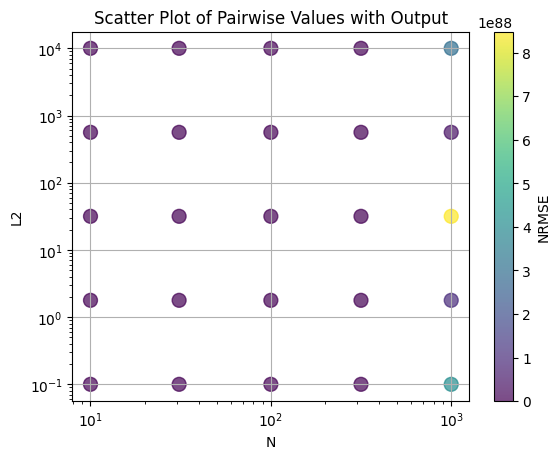

In [57]:

#function to generate random matrix X from generartor matrix
def Matrix_for_Regression(N,D,G):
 E = np.random.randn(N,D)         #creates random matrix of N*D with standard normal distribution
 X= np.dot(E,G)               #multiplying E with the generator identity matrix G to give an output matrix X of size NxD
 return X

#function to generate target vector
def targetVec(X,sigma,D):
    W1 = np.random.randn(D,1)
    A= np.dot(X,W1)                           #Dimensions of A are N*D*D*1=N*1
    Noise= np.random.normal(0, sigma)  #randomly generated  guassain noise with input variance and mean zero
    t= A+ Noise                                 #target vector with zero noise and given sigma
    return t
#function to split given data Matrix X and target vector t into training and validation subsets
#splitting data as 90% of total data and validation data is remaining 10%
def train(X, t):
    N=t.shape[1]
    T = int(N*0.9)                          # Splitting data into training and validation subsets
    X_T, X_V = X[:T], X[T:]                 # Training and validation samples of input vector X
    t_T, t_V = t[:T], t[T:]                 # Training and validation samples of target vector t
    return X_T, t_T, X_V, t_V

#defining function for Gradient of L2 norm
def grad_L2norm(W):
  grad_L2norm= 2*W                  #reference quetion 6
  return grad_L2norm

def grad_MSE(X,t,y):
  N=t.shape[1]
  error= np.subtract(t,y)
  gradient = np.dot(np.transpose(X), error)*(-2/N)            #reference quetion 5
  return gradient

#gradient decent                                              #reference quetion 8
def gradient_decent(X,D, t,n,L2):
    N=t.shape[1]
    W= np.random.randn(D,1)
    for _ in range(100):
        y = np.dot(X,W)
        gradient_MSE1=grad_MSE(X,t,y)
        grad_L2norm1=grad_L2norm(W)
        grad_loss= gradient_MSE1+ (2*L2*grad_L2norm1)
        W = W - (n * grad_loss)
    return W
#function for NRMSE
def NRMSE(X,D,t,n,L2):                                      #reference question 4
  N=t.shape[1]
  W= gradient_decent(X,D,t,n,L2)
  y= np.dot(X,W)
  error_matrix= np.subtract(t,y)                              #creating error array
  sqr_error= np.square(error_matrix)
  square_error= np.sum(sqr_error)                             #total error of array
  Mean_sqr_error= (square_error/N)
  RMSE=np.sqrt(Mean_sqr_error)
  NRMSE=RMSE/(np.max(t)-np.min(t))
  return NRMSE

#Providing parameters for function
D=3                                                   #total number of feaures
"""N = [10, 100, 1000, 10000, 100000]                    #5 values of N
L2 = [0.00001, 0.0001, 0.001, 0.01, 0.1]  """            #5 values of Lambda2
# Logarithmically spaced values for N
N = np.logspace(1, 3, num=5 ,dtype=int)

# Logarithmically spaced values for L2
L2 = np.logspace(-1, 4, num=5)
sigma = 0.075                                           #standard deviation
n = 0.0001                                               #learning rate

#creating Generator matrix G constant for all pairs
G = np.random.randn(D, D)

average_nrmse = {}
#loop for calculating NRMSE for pairs of L2 and N
for n_val in N:                                                                             #takes each value of N
    for l2_val in L2:                                                                       #takes each value of L2
        nrmse_list = []                                                                     #create empty list
        for _ in range(5):                                                                  #loop for averaging NRMSE 5 times
            X = Matrix_for_Regression(n_val, D, G)                                          #create input matrix X
            t = targetVec(X, sigma, D)
            X_T, t_T, X_V, t_V= train(X,t)                                                  #create target vector t
            W= gradient_decent(X_T, D, t_T, n, l2_val)                                   #create Weight vector W
            y= np.dot(X_V,W)                                                                  #predicted vector
            nrmse = NRMSE(X_V,D,t_V,n,L2)     #NRMSE1(y, W, n, D, n_val, l2_val)
            nrmse_list.append(nrmse)
        average_nrmse[(n_val, l2_val)] = np.mean(nrmse_list)

#print array of average NRMSE for each pair
print(average_nrmse)
                                                                                                    #for plot I have taken some reference from chatgpt


#for providing each N,L2 pair to plot
N_values = [pair[0] for pair in average_nrmse.keys()]
L2_values = [pair[1] for pair in average_nrmse.keys()]


# Extract corresponding NRMSE values from average_nrmse values
nrmse_values = list(average_nrmse.values())

#Scatter plot
plt.scatter(N_values, L2_values, c=nrmse_values, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='NRMSE')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('N')
plt.ylabel('L2')
plt.title('Scatter Plot of Pairwise Values with Output')#
plt.grid(True)
plt.show()





Observation:
Above plot shows NRMSE with respect to pairs of N and L2. For each value of sample size we can see the variation of NRMSE fir different values of Lambda2. For each sample size N value of L2 where NRMSE is least is called sweat spot. This value of L2 is taken for regularisation of the model for that sample size.

11. Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot
weights versus 1/λ1. Comment on the results. Introduce correlations in the columns of X and repeat
the experiment. Are the results different? Comment on the results. [1]

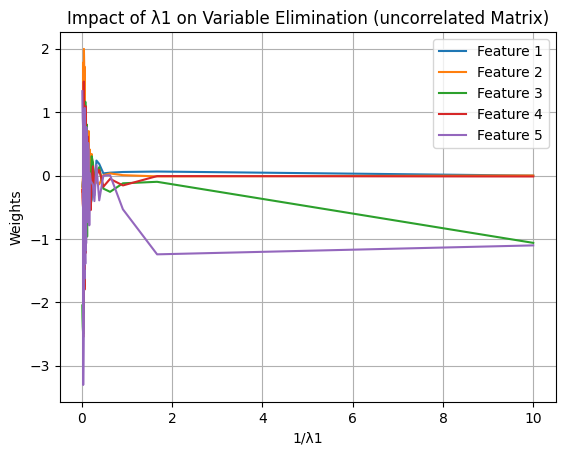

In [6]:

#for matrix with uncorelated columns
#As stated in question 1:f the generator matrix S of size MxD is an identity matrix, then each column of X will remain independent
def Matrix_for_Regression(D):
    G = np.identity(D)  # creating identity generator matrix with dimensions equals to number of weights
    E = np.random.randn(1, D)  # creates random matrix of 1xD with standard normal distribution
    X = np.matmul(E, G)  # multiplying E with the generator identity matrix G to give an output matrix X of size 1xD
    return X

# Function to generate target vector                                    # ref question2
#function to generate target vector
def targetVec(X, sigma,W):
    t = np.dot(X, W) + np.random.normal(0, sigma, size=X.shape[0])  # generate target vector with noise
    return t


# Gradient descent function for Mean Squared Error                       #ref question
def grad_MSE(X, t, n, L1, W):
    for i in range(1000):
        y = np.dot(X, W)
        error = t - y
        gradient = np.dot(X.T, error) * (-2) + 2 * L1 * np.sign(W)        #gradient of MSE and L1 reg
        W = W - (n * gradient)
    return W

#parameters for calculations
#N= 8                                              #total number of
D = 5                                             #total number of features
sigma = 0.6                                       #standard deviation
n = 0.05                                         #learning rate
W = np.random.randn(D, 1)                         #random weight vector
L1 = np.arange(0.1, 100, 0.5)

#creating empty list of weights
weights = []

#creating data vector and target vector
X = Matrix_for_Regression(D)
t = targetVec(X, sigma, W)


#loop for finding weights for each L1 value
for l1_vals in L1:
    W1 = grad_MSE(X, t, n, l1_vals, W)
    weights.append(W1)

weights = np.array(weights)

#Loop for plot
for i in range(D):
    plt.plot(1 / L1, weights[:, i], label=f'Feature {i+1}')                     #ref: chatgpt

plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('Impact of λ1 on Variable Elimination (uncorrelated Matrix)')
plt.legend()
plt.grid(True)
plt.show()


observation:

Above plot of 1/lambda v/s Weights shows that  Weights corresponding to each feature tends toward zero as lamda 1 incrseas. Some weights initially converge to zero some after large values of lambda1. this behaviour shows how large values of lamda 1 can create sparsity in weight vector.

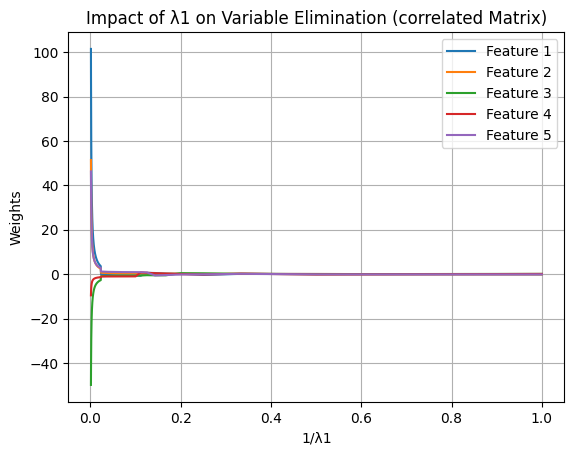

In [5]:

#for matrix with corelated columns
#As stated in question 1:f the generator matrix S of size MxD is an identity matrix, then each column of X will remain independent
def Matrix_for_Regression(D):
    G = np.identity(D)  # creating identity generator matrix with dimensions equals to number of weights
    E = np.random.randn(1, D)  # creates random matrix of 1xD with standard normal distribution
    X = np.dot(E, G)  # multiplying E with the generator identity matrix G to give an output matrix X of size 1xD
    X[:, 0] = (2 * X[:, 1])

    return X

# Function to generate target vector                                    # ref question2
#function to generate target vector
def targetVec(X, sigma,W):
    t = np.dot(X, W) + np.random.normal(0, sigma, size=X.shape[0])  # generate target vector with noise
    return t


# Gradient descent function for Mean Squared Error                       #ref question
def grad_MSE(X, t, n, L1, W):
    for i in range(1000):
        y = np.dot(X, W)
        error = t - y
        gradient = np.dot(X.T, error) * (-2) + 2 * L1 * np.sign(W)        #gradient of MSE and L1 reg
        W = W - (n * gradient)
    return W

#parameters for calculations
#N= 8                                              #total number of
D = 5                                             #total number of features
sigma = 0.6                                       #standard deviation
n = 0.05                                         #learning rate
W = np.random.randn(D, 1)                         #random weight vector
L1 = np.arange(1, 1000, 1)

#creating empty list of weights
weights = []

#creating data vector and target vector
X = Matrix_for_Regression(D)
t = targetVec(X, sigma, W)


#loop for finding weights for each L1 value
for l1_vals in L1:
    W1 = grad_MSE(X, t, n, l1_vals, W)
    weights.append(W1)

weights = np.array(weights)

#Loop for plot
for i in range(D):
    plt.plot(1 / L1, weights[:, i], label=f'Feature {i+1}')                     #ref: chatgpt

plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('Impact of λ1 on Variable Elimination (correlated Matrix)')
plt.legend()
plt.grid(True)
plt.show()

Obsservation:

Above plot of 1/lambda v/s Weights shows that Weights corresponding to each feature tends toward zero as lamda 1 incrseas. Some weights initially converge to zero some after large values of lambda1. this behaviour shows how large values of lamda 1 can create sparsity in weight vector.
Hw\owever in this plot we have introduced coreeletion betwwn columns 1 and 2, So weights corresponding to these feature either incsrese simultaneously or decrese simultaneously.

12. Show the grouping effect of elastic net on correlated columns of X. [1]

Enter the number of samples: 5
Enter the number of features: 4


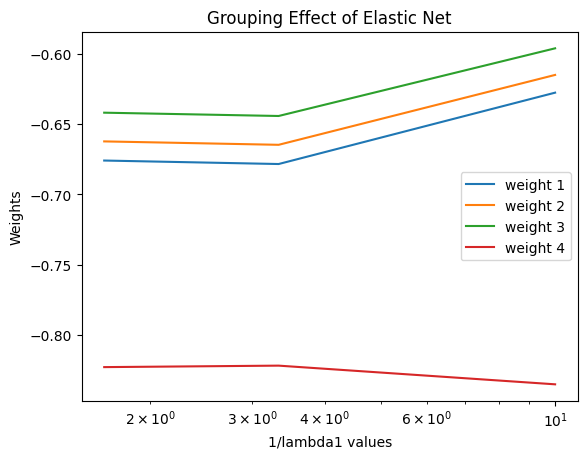

[[-0.62760365 -0.61498748 -0.59606322 -0.83507232 -0.81835038 -0.79326746
  -0.64750058 -0.63502551 -0.61631291 -0.72286378 -0.70946356 -0.68936323]
 [-0.67836626 -0.66469917 -0.64419853 -0.82178037 -0.8053371  -0.78067221
  -0.68556139 -0.67230007 -0.65240809 -0.75833907 -0.74420256 -0.7229978 ]
 [-0.67588636 -0.66227065 -0.64184709 -0.82283262 -0.80636754 -0.78166993
  -0.68409496 -0.67086401 -0.65101759 -0.75676546 -0.74266156 -0.72150571]]


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def grad_L1norm(W):             #ref= Q7
    # Gradient of L1 norm is constant with the sign of W
    W[W < 0] = -1
    W[W > 0] = 1
    grad_L1norm = W
    return grad_L1norm

def grad_L2norm(W):                 #ref= Q6
    grad_L2norm = 2 * W
    return grad_L2norm

def grad_MSE(X, t, y, N):             #ref= Q5
    error = np.subtract(t, y)
    gradient = np.dot(np.transpose(X), error) * (-2/N)
    return gradient

def gradient_decent(X, W, t, n, L1, L2, N):       #ref: Q8
    for i in range(1000):
        y = np.dot(X, W)
        gradient_MSE1 = grad_MSE(X, t, y, N)
        grad_L1norm1 = grad_L1norm(W)
        grad_L2norm1 = grad_L2norm(W)
        grad_loss = gradient_MSE1 + (L1 * grad_L1norm1) + (2 * L2 * grad_L2norm1)
        W = W - (n * grad_loss)
    return W

def el_net_group_eff(n,d,lam1,lam2,learn_rate,no_of_iterations): #ref: Discussion with batchmate

    X=np.random.randn(n,d)
    t=np.random.randn(n,1)
    w_old = np.zeros((d,1))
    stop_criteria= 10**(-5)
    output_weights_net = []

    for i in lam1:

        for j in range (no_of_iterations):
            y= np.dot(X,w_old)
            err=(y - t)
            mse_grad= grad_MSE(X, t, y, n)
            l2_grad= grad_L2norm(w_old)
            l1_grad= grad_L1norm(w_old)
            total_grad=mse_grad+lam1*l1_grad+lam2*l2_grad
            w_new=w_old-(learn_rate*total_grad)

            stop_w = np.linalg.norm(w_new - w_old)


            if stop_w<stop_criteria:
                break
            w_old=w_new

        output_weights_net.append(w_old.flatten())

    output_weights_net = np.array( output_weights_net)

    length_of_output_weights_net=len( output_weights_net[0])

    for i in range(d):
        ploty.plot(1 / np.array(lam1), output_weights_net[:, i], label=f'weight {i + 1}')
    ploty.xscale("log")
    ploty.xlabel("1/lambda1 values")
    ploty.ylabel("Weights")
    ploty.legend()
    ploty.title('Grouping Effect of Elastic Net')
    ploty.show()
    return output_weights_net

N = int(input("Enter the number of samples: "))
D = int(input("Enter the number of features: "))
L1 = [0.1, 0.3, 0.6]  # L1 regularization parameter
L2 = 1                # L2 regularization parameter
n = 0.8               # Learning rate5
n= 0.1 #learning rate=step function
i=5       #"No. of iteration

# Assuming X and t are defined somewhere in your code
X = np.random.randn(N, D)
t = np.random.randn(N, 1)

el_net_group_eff_op = el_net_group_eff(N, D, L1, L2, n,i)
print(el_net_group_eff_op)


5
10
20
3


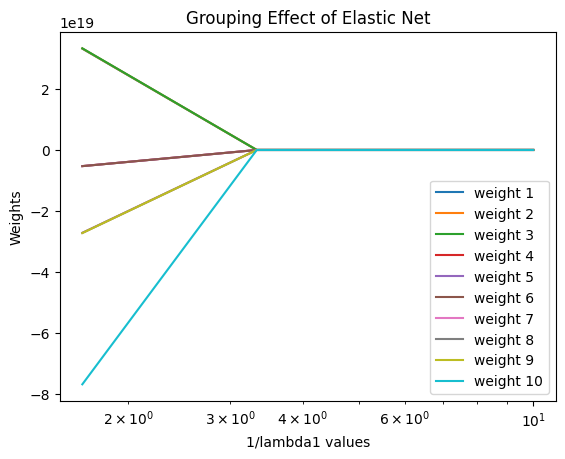

<function el_net_group_eff at 0x7e305a80af80>


In [26]:
import numpy as np
import matplotlib.pyplot  as ploty

def el_net_group_eff(n,d,lam1,lam2,learn_rate,no_of_iterations): #,stop_criteria

    x_i=np.random.randn(n,d)
    t_i=np.random.randn(n,1)
    w_old = np.zeros((d,1))
    stop_criteria= 10**(-5)

    output_weights_net = []

    for i in lam1:



        for j in range (no_of_iterations):
            y_i= np.dot(x_i,w_old)
            err=(y_i - t_i)
            mse_grad= 2*np.dot(x_i.T,err)/n
            l2_grad= 2*w_old
            l1_grad= np.sign(w_old)
            total_grad=mse_grad+lam1*l1_grad+lam2*l2_grad
            w_new=w_old-(learn_rate*total_grad)

            stop_w = np.linalg.norm(w_new - w_old)


            if stop_w<stop_criteria:
                break
            w_old=w_new

        output_weights_net.append(w_old.flatten())

    output_weights_net = np.array( output_weights_net)

    length_of_output_weights_net=len( output_weights_net[0])

    for i in range(d):
        ploty.plot(1 / np.array(lam1), output_weights_net[:, i], label=f'weight {i + 1}')
    ploty.xscale("log")
    ploty.xlabel("1/lambda1 values")
    ploty.ylabel("Weights")
    ploty.legend()
    ploty.title('Grouping Effect of Elastic Net')
    ploty.show()
    return output_weights_net

n=int(input())   #n=no.of samples
d=int(input())      #d=no.of features
lam1=[0.1,0.3,0.6] #lam1=l1 regulari4554e5zation parameter
lam2=0.5 #lam2=l2 regularization parameter
learn_rate= float(input()) #learning rate=step function
#stop_criteria= np.random.randn(n,1)
no_of_iterations=int(input())

el_net_group_eff_op=el_net_group_eff(n,d,lam1,lam2,learn_rate,no_of_iterations)  #stop_criteria)
print(el_net_group_eff)

13. Write a function for generating linear binary classification vector t with noise variance σ.

In [7]:
def binary(X,W,sigma,N):
  Noise= np.random.normal(0, sigma,X.shape)   # creating guassian noise of variance sigma
  XE= X+ Noise                        #adding guassian noise to input vector
  H= np.dot(XE,W)
  Y1= np.exp(H)
  t= np.divide(Y1, (Y1+1))                    #sigmoid function
  t[t>0.5]= 1                       #checking for class 1 or 0. If sigmoid value is greater than 0.5 then X belongs to class 1
                                    #lable output of function to 1 for class 1
  t[t<0.5]= 0                       #lable output of function to 0 for class 0

  return t
#provide total number of samples
N=int(input("provide total number of samples"))
#provide total number of features
D=int(input("provide total number of features"))
sigma= 0.75

#Generating random data matrix X
X= np.random.randn(N,D)
#Generating random weight vector W
W= np.random.randn(D,1)

#finding function output for given random matrix X and vector W
t= binary(X,W,sigma,N)
#printing output of
print(t)

provide total number of samples5
provide total number of features5
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [ ]:
#Without sigmoid function

def binary(X,W,sigma,N):
  Noise= np.random.normal(0, sigma)   # creating guassian noise of variance sigma
  XE= X+ Noise                        #adding guassian noise to input vector
  t= np.dot(XE,W)
  t[t>0]= 1                       #checking for class 1 or 0. If  value is greater than 0 then X belongs to class 1
                                    #lable output of function to 1 for class 1
  t[t<0]= 0                       #lable output of function to 0 for class 0
  return t
#provide total number of samples
N=int(input("provide total number of samples"))
#provide total number of features
D=int(input("provide total number of features"))
sigma= 0.75

#Generating random data matrix X
X= np.random.randn(N,D)
#Generating random weight vector W
W= np.random.randn(D,1)

#finding function output for given random matrix X and vector W
t= binary(X,W,sigma,N)
#printing output of
print(t)

provide total number of samples2
provide total number of features2
[[1.]
 [1.]]


 Write a function for computing gradient of binary cross-entropy for logistic regression. [0.5]

In [11]:
def BCE(X,W,t):
  H= np.dot(X,W)
  Y1= np.exp(H)
  y= np.divide(Y1, (Y1+1))
  BCE= - np.sum(np.dot(t.T,np.log(y))+ np.dot((1-t).T,np.log(1-y)))
                                                                            #Binary cross entropy for logistic regression (formula taken from notes)
  return BCE

#provide total number of samples
N=int(input("provide total number of samples"))
#provide total number of features
D=int(input("provide total number of features"))
#Generating random data matrix X
X= np.random.randn(N,D)
#Generating random weight vector W
W= np.random.randn(D,1)
#Generating target vector t
t= np.random.randint(2, size=(N,1))

Binary_CE= BCE(X,W,t)
print(Binary_CE)


provide total number of samples5
provide total number of features7
-6.718469520446252


Repeat experiment 10 for binary classification.

{(100, 0.01): 0.04, (100, 0.31622776601683794): -0.04, (100, 10.0): 0.06, (100, 316.22776601683796): -0.14, (100, 10000.0): 0.06, (562, 0.01): 0.0, (562, 0.31622776601683794): 0.0, (562, 10.0): 0.014035087719298246, (562, 316.22776601683796): -0.021052631578947368, (562, 10000.0): 0.0, (3162, 0.01): 0.011987381703470032, (3162, 0.31622776601683794): 0.004416403785488959, (3162, 10.0): 0.014511041009463722, (3162, 316.22776601683796): -0.00694006309148265, (3162, 10000.0): 0.007570977917981073, (17782, 0.01): -0.003709949409780776, (17782, 0.31622776601683794): -0.006632939853850478, (17782, 10.0): 0.004496908375491849, (17782, 316.22776601683796): -0.00505902192242833, (17782, 10000.0): -0.019786396852164136, (100000, 0.01): 0.00494, (100000, 0.31622776601683794): 0.0161, (100000, 10.0): -0.00402, (100000, 316.22776601683796): 0.00308, (100000, 10000.0): 0.02324}


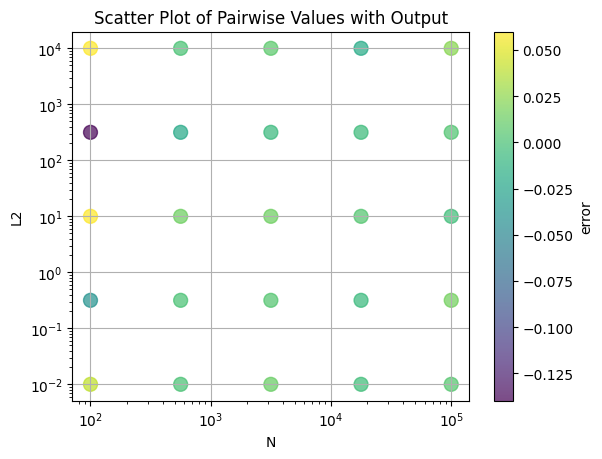

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random matrix X from generator matrix
def Matrix_for_Regression(N, D, G):
    E = np.random.randn(N, D)         # creates random matrix of N*D with standard normal distribution
    X = np.dot(E, G)                  # multiplying E with the generator identity matrix G to give an output matrix X of size NxD
    return X

# Function to generate target vector
def targetVec(X, sigma, D):
    W1 = np.random.randn(D, 1)
    A = np.dot(X, W1)                           # Dimensions of A are N*D*D*1=N*1
    Noise = np.random.normal(0, sigma)          # randomly generated Gaussian noise with input variance and mean zero
    t = A + Noise                               # target vector with zero noise and given sigma
    t[t > 0] = 1                                 # checking for class 1 or 0. If value is greater than 0 then X belongs to class 1
    t[t < 0] = 0
    return t

# Function to split given data Matrix X and target vector t into training and validation subsets
# splitting data as 90% of total data and validation data is remaining 10%
def train(X, t):
    N = X.shape[0]
    T = int(N * 0.9)                            # Splitting data into training and validation subsets
    X_T, X_V = X[:T], X[T:]                     # Training and validation samples of input vector X
    t_T, t_V = t[:T], t[T:]                     # Training and validation samples of target vector t
    return X_T, t_T, X_V, t_V

# Defining function for Gradient of L2 norm
def grad_L2norm(W):
    grad_L2norm = 2 * W                         # reference question 6
    return grad_L2norm

def grad_MSE(X, t, y, N):
    error = np.subtract(t, y)
    grad = np.dot(X.T, np.subtract(y, t))        # reference question 5
    return grad

# Gradient descent function
def gradient_decent(X, D, t, n, L2):
    N = t.shape[1]
    W = np.random.randn(D, 1)
    for _ in range(100):
        y = np.dot(X, W)
        y[y > 0] = 1                              # checking for class 1 or 0. If value is greater than 0 then X belongs to class 1
        y[y < 0] = 0
        gradient_MSE1 = grad_MSE(X, t, y, N)
        grad_L2norm1 = grad_L2norm(W)
        grad_loss = gradient_MSE1 + (2 * L2 * grad_L2norm1)
        W = W - (n * grad_loss)
    return W

# Function for error

# Function to calculate classification error
def classification_error(X, D, t, n, L2):
    N = t.shape[1]
    W = gradient_decent(X, D, t, n, L2)
    y = np.dot(X, W)
    y[y > 0] = 1                                 # checking for class 1 or 0. If value is greater than 0 then X belongs to class 1
    y[y < 0] = 0
    error = np.subtract(t, y)
    return error



# Parameters for function
D = 3                                             # total number of features
N = np.logspace(2, 5, num=5, dtype=int)           # Logarithmically spaced values for N
L2 = np.logspace(-2, 4, num=5)                    # Logarithmically spaced values for L2
sigma = 0.075                                     # standard deviation
n = 0.01                                        # learning rate

# Creating Generator matrix G constant for all pairs
G = np.random.randn(D, D)

average_error = {}
# Loop for calculating error for pairs of L2 and N
for n_val in N:                                   # takes each value of N
    for l2_val in L2:                             # takes each value of L2
        error_list = []                            # create empty list
        for _ in range(5):                         # loop for averaging error 5 times
            X = Matrix_for_Regression(n_val, D, G)                  # create input matrix X
            t = targetVec(X, sigma, D)
            X_T, t_T, X_V, t_V = train(X, t)                         # create target vector t
            W = gradient_decent(X_T, D, t_T, n, l2_val)                # create Weight vector W
            y = np.dot(X_V, W)                                      # predicted vector
            error = classification_error(X_V, D, t_V, n, l2_val)                    # NRMSE1(y, W, n, D, n_val, l2_val)
            error_list.append(error)
        average_error[(n_val, l2_val)] = np.mean(error_list)

# Print array of average error for each pair
print(average_error)

# Extract corresponding error values from average_error values
error_values = list(average_error.values())

# For scatter plot
N_values = [pair[0] for pair in average_error.keys()]
L2_values = [pair[1] for pair in average_error.keys()]

# Scatter plot
plt.scatter(N_values, L2_values, c=error_values, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='error')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('N')
plt.ylabel('L2')
plt.title('Scatter Plot of Pairwise Values with Output')
plt.grid(True)
plt.show()


Observation: Above plot shows error with respect to pairs of N and L2. For each value of sample size we can see the variation of error fir different values of Lambda2. For each sample size N value of L2 where errror is least is called sweat spot. This value of L2 is taken for regularisation of the model for that sample size.